## Bem vindo! 

##### Esse projeto visa simular um corpo em queda livre, sob a ação da resistência do ar, ou não, com o intuito de analisar os princípios de conservação e dissipação de energia (proposta de projeto 4)

**Feito por:** Arthur de Carvalho, Marcel Figueredo e Paulo de Pinho

**Bibliotecas usadas:** Math, Numpy e Matplotlib 

**Constantes usadas:** 

- **Aceleração da gravidade:**  9,8 m/s²
- **Força de resistência do ar (arrasto):** 0,0892 x v² 


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# declarando os valores iniciais:
g = 9.8 # aceleração da gravidade
k = 0.0892 # coeficiente de arrasto
m_objeto = float(input("Insira a massa do objeto (Kg): ")) # massa do objeto
h_objeto = float(input("Insira a distância do objeto em relação ao chão (m): ")) # distância do objeto ao chão

In [ ]:
# implementando resistência do ar:
input_resistencia = input("Deseja considerar a resistência do ar? (s/n): ").strip().lower()
if input_resistencia == 's':
    print("Considerando resistência do ar no cálculo da altura durante a queda.")
    v_terminal = math.sqrt(m_objeto * g / k) # velocidade terminal
    termo_exp = math.exp((g * h_objeto) / (v_terminal**2)) # uma variável auxiliar para calcular o tempo real de queda, considerando a resistência do ar 
    t_final = (v_terminal / g) * math.acosh(termo_exp) # calculando o tempo final de queda, considerando a resistência do ar
    t_queda = np.linspace(0, t_final, num=1000) # tempo de queda em difrentes instantes do movimento
    v = v_terminal * np.tanh((g / v_terminal) * t_queda) # velocidade do objeto ao longo do movimento
    h_t = h_objeto - (m_objeto / k) * np.log(np.cosh((k / m_objeto) * t_queda * v_terminal)) # altura do objeto em função do tempo
    h_t = np.maximum(h_t, 0.0) # limitano a altura a zero (para que o objeto não atravesse o chão após o impacto)
else:
    print("Desconsiderando resistência do ar no cálculo da altura durante a queda.")
    t_final = math.sqrt(2 * h_objeto / g) # tempo de queda final
    t_queda = np.linspace(0, t_final, num=1000) # tempo de queda em diferentes instantes
    h_t = h_objeto - 0.5 * g * t_queda**2 # computando altura como função do tempo sob a queda livre
    h_t = np.maximum(h_t, 0.0) # limitando a altura a zero (para que o objeto não atravesse o chão após o impacto)
    v = g * t_queda # velocidade do objeto ao longo do movimento

# calculando energia cinética e potencial:
energia_cinetica = 0.5 * m_objeto * v ** 2 # calculo da energia cinética nos diversos instantes de tempo
energia_potencial = m_objeto * g * h_t # energia potencial gravitacional em relação ao tempo

Desconsiderando resistência do ar no cálculo da altura durante a queda.


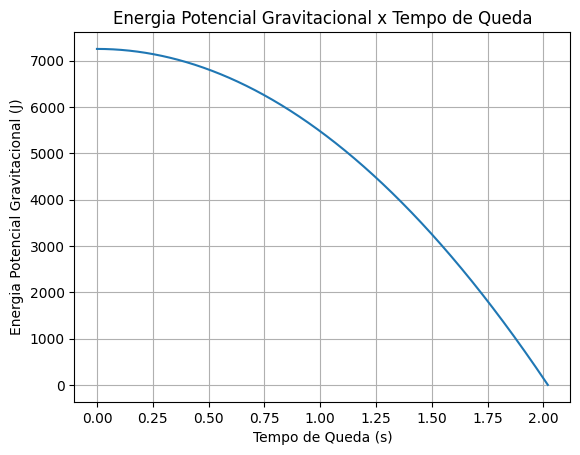

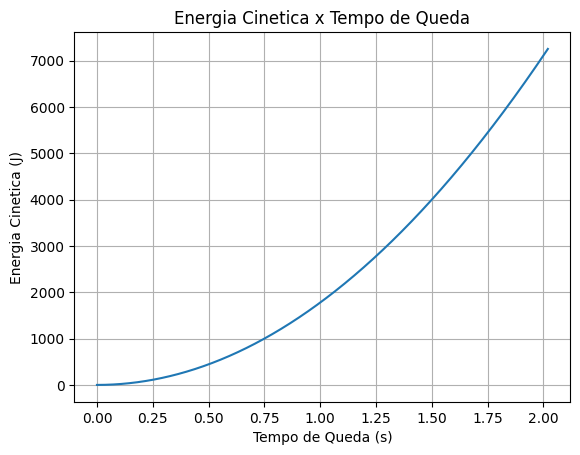

A energia total do sistema é constante ao longo do tempo, conforme esperado pela conservação de energia.


In [ ]:
# plotando energia potencial gravitacional em função do tempo de queda:
fig, ax = plt.subplots()
ax.plot(t_queda, energia_potencial)
ax.set_title("Energia Potencial Gravitacional x Tempo de Queda")
ax.set_xlabel("Tempo de Queda (s)")
ax.set_ylabel("Energia Potencial Gravitacional (J)")
plt.grid(True)
plt.show()

# plotando energia cinética em função do tempo de queda:
fig, ax = plt.subplots()
ax.plot(t_queda, energia_cinetica)
ax.set_title("Energia Cinética x Tempo de Queda")
ax.set_xlabel("Tempo de Queda (s)")
ax.set_ylabel("Energia Cinética (J)")
plt.grid(True)
plt.show()

# verificando se há dissipação de energia, e plotando gráfico, se houver
energia_total = energia_potencial + energia_cinetica # calculando energia total do sistema, somando energia potencial e cinética
energia_total_constante = np.allclose(energia_total, energia_total[0]) # verificando se a energia total é constante
if energia_total_constante:
    print("A energia total do sistema é constante ao longo do tempo, conforme esperado pela conservação de energia.")
else:
    print("A energia total do sistema não é constante, logo há alguma perda de energia (devido à resistência do ar).")
    energia_dissipada = m_objeto * g * h_objeto - energia_total # calculando a energia dissipada pela resistência do ar
    # plotando gŕafico de
    fig, ax = plt.subplots()
    ax.plot(t_queda, energia_dissipada)
    ax.set_title("Energia Dissipada x Tempo de Queda")
    ax.set_xlabel("Tempo de Queda (s)")
    ax.set_ylabel("Energia Dissipada (J)")
    plt.grid(True)
    plt.show()